In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv('mhealth_raw_data.csv')
data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


# Preprocessing

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop subject column
    df = df.drop('subject', axis=1)
    
    # Sample 2000 examples from each class
    samples = []
    for category in df['Activity'].unique():
        category_slice = df.query("Activity == @category")
        samples.append(category_slice.sample(2000, random_state=1))
    df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    # Split df into X and y
    y = df['Activity']
    X = df.drop('Activity', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [14]:
X_train

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
11053,0.187104,0.006277,-0.228013,-1.505719,-0.704517,0.614794,0.429857,-0.326943,-0.339706,-1.321750,-0.160711,-1.172536
12600,0.012679,-0.068988,-0.629651,0.902903,1.395136,-0.902048,0.000880,-1.372901,0.030727,1.367656,-0.637630,0.102802
7364,-0.738023,-0.330316,-0.073460,-0.121955,-0.650918,0.948702,1.092318,-0.166351,0.936759,1.600883,0.154742,1.141817
4806,-0.308225,-0.369919,0.017368,1.034512,-0.440953,0.579264,-0.098113,-0.486392,-0.255824,-0.811564,-0.434833,0.514347
19271,-0.037292,-0.133830,-0.040404,1.273764,-0.311398,0.245348,0.103261,0.076830,-0.345337,-0.053581,-0.675176,0.836221
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.187578,-0.149895,0.305091,-1.398054,-0.494552,0.859905,0.126550,-0.549477,-0.349606,-1.077594,-0.551255,-1.017697
17289,-0.594098,-0.070707,0.426514,-1.629332,-0.414142,-0.259076,0.567035,-0.604562,-0.148987,0.073970,-0.983113,-1.628888
5192,0.155570,1.820917,1.579206,0.771315,3.610939,0.355470,-1.006433,0.850732,-0.137042,-0.436215,2.291497,0.620277
12172,-0.042024,0.086213,-0.642605,1.098307,-0.458811,-0.081463,1.001877,0.126247,1.179228,2.001750,0.342507,0.824008


In [15]:
y_train.value_counts()

11    1434
3     1424
5     1418
12    1417
10    1406
8     1405
0     1398
7     1392
1     1388
9     1383
4     1382
6     1377
2     1376
Name: Activity, dtype: int64

# Training

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)

acc = model.score(X_test,y_test)
print("Test Accuracy: {:.2f}%".format(acc*100))

Test Accuracy: 55.46%


# Confusion Matrix

In [20]:
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

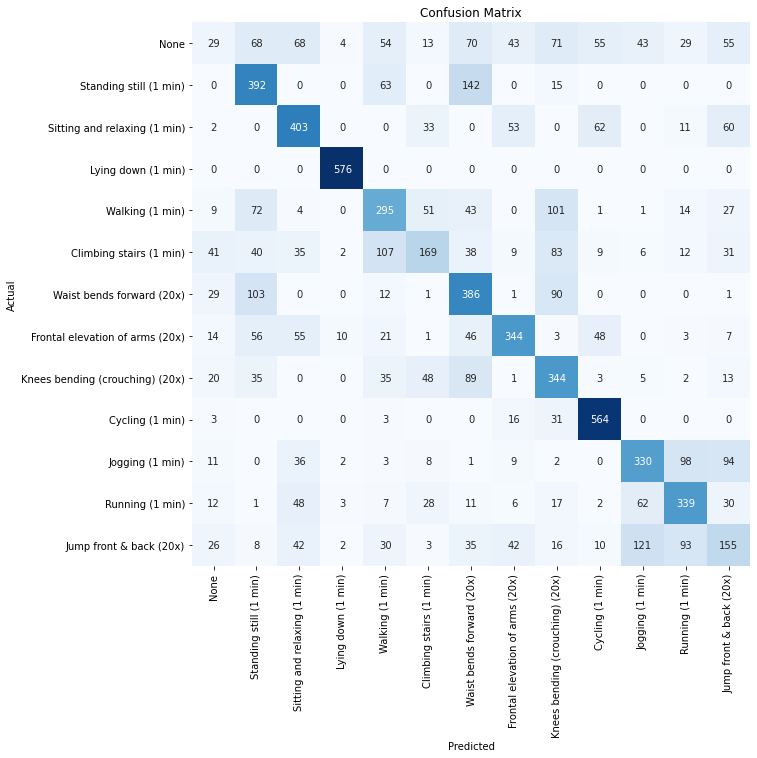

Classification Report: 
--------------------------------
                                  precision    recall  f1-score   support

                           None       0.15      0.05      0.07       602
         Standing still (1 min)       0.51      0.64      0.57       612
   Sitting and relaxing (1 min)       0.58      0.65      0.61       624
             Lying down (1 min)       0.96      1.00      0.98       576
                Walking (1 min)       0.47      0.48      0.47       618
        Climbing stairs (1 min)       0.48      0.29      0.36       582
      Waist bends forward (20x)       0.45      0.62      0.52       623
Frontal elevation of arms (20x)       0.66      0.57      0.61       608
Knees bending (crouching) (20x)       0.45      0.58      0.50       595
                Cycling (1 min)       0.75      0.91      0.82       617
                Jogging (1 min)       0.58      0.56      0.57       594
                Running (1 min)       0.56      0.60      0.58   

In [21]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred,labels=list(range(13)))
clr = classification_report(y_test,y_pred,labels=list(range(13)),target_names = activity_labels.values())
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(ticks=np.arange(13)+0.5,labels=activity_labels.values(),rotation=90)
plt.yticks(ticks=np.arange(13)+0.5,labels=activity_labels.values(),rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report: \n--------------------------------\n",clr)